In [103]:
from random import shuffle
from statistics import linear_regression
import pandas as pd
import numpy as np
import plotly
import matplotlib
from matplotlib import pyplot as plt

In [104]:
file=pd.read_csv("E:\\Bengaluru_House_Data.csv")
file.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [105]:
file.shape

(13320, 9)

In [106]:
file.groupby("area_type")["area_type"].agg("count") #various area type andtheir value 

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [107]:
file1=file.drop(["area_type","society","balcony","availability"],axis="columns") # dropping those key value which are not wanted
file1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [108]:
file1.isnull().sum() #tells no. of values which are not availble or are void


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [109]:
file2=file1.dropna() #drops NAn values
file2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [110]:
file2.shape

(13246, 5)

In [111]:
file2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [112]:
file2["bhk"]=file2["size"].apply(lambda x:int(x.split(" ")[0])) #summoning all unqieu values of size column in new bhk column and splitting every strings into two part so that only integer can be used for bhk using lambda function where x can be 2BHK etc
file2.head()

C:\Users\oshim\AppData\Local\Temp\ipykernel_2864\2060416035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file2["bhk"]=file2["size"].apply(lambda x:int(x.split(" ")[0])) #summoning all unqieu values of size column in new bhk column and splitting every strings into two part so that only integer can be used for bhk using lambda function where x can be 2BHK etc


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [113]:
file2[file2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [114]:
file2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [115]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [116]:
file2[~file2["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [117]:
file3=file2.copy()

In [118]:
def convert_sqft_to_num(x):
    tokens=x.split("-")
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [119]:
file4=file3.copy()
file4["total_sqft"]=file4["total_sqft"].apply(convert_sqft_to_num)
file4.head(3)



,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [120]:
file4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [121]:
file5=file4.copy()
file5["price_per_sqft"]=file5["price"]*100000/file5["total_sqft"] #making price persqft coulmn


In [122]:
len(file5.location.unique())

1304

In [123]:
file5.location=file5.location.apply(lambda x: x.strip())
location_stats=file5.groupby("location")["location"].agg("count").sort_values(ascending=False) #aggregation count on location column
location_stats


location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [124]:
len(location_stats[location_stats<=10])

1052

In [125]:
location_stats_lessthan_10=location_stats[location_stats<=10] #assigned to new variable
file5.location=file5.location.apply(lambda x: "other" if x in location_stats_lessthan_10 else x) #it will shift to "other " for x and rest is in location column  of file5
len(file5.location.unique())

242

In [126]:
file5[(file5.total_sqft/file5.bhk<300)].head() #this will remove flats which has bedroom size less than 300 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [127]:
file5.shape


(13246, 7)

In [128]:
file6=file5[~(file5.total_sqft/file5.bhk<300)] #this will remove flats which has bedroom size less than 300 

In [129]:
file6.shape

(12502, 7)

In [130]:
file6.price_per_sqft.describe() # gives pricepersqft all description like max,min,avg value etc

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [131]:
def remove_pps_outliers(file):
    file_out=pd.DataFrame()
    for key,subfile in file.groupby("location"):
        m=np.mean(subfile.price_per_sqft)
        st=np.mean(subfile.price_per_sqft)
        reduced_file=subfile[(subfile.price_per_sqft>(m-st)) & (subfile.price_per_sqft<=(m+st))]
        file_out=pd.concat([file_out,reduced_file],ignore_index=True)
    return file_out
file7=remove_pps_outliers(file6) 
file7.shape

(12027, 7)

In [132]:
def remove_bhk_outliers(file0):
    exclude_indices=np.array([])
    for location, location_file0 in file0.groupby("location"):
        bhk_stats={}
        for bhk, bhk_file0 in location_file0.groupby("bhk"):
            bhk_stats[bhk]={
                "mean": np.mean(bhk_file0.price_per_sqft),
                "std": np.std(bhk_file0.price_per_sqft),
                "count": bhk_file0.shape[0]
            }
        for bhk,bhk_file0 in location_file0.groupby("bhk"):
            stats=bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                exclude_indices=np.append(exclude_indices,bhk_file0[bhk_file0.price_per_sqft<(stats["mean"])].index.values)
    return file0.drop(exclude_indices,axis="index")
file8=remove_bhk_outliers(file7)
file8.shape

(8623, 7)

In [133]:
file8.bath.unique()

array([ 4.,  3.,  2.,  5.,  7.,  1.,  8.,  6.,  9., 10., 12., 16., 13.])

In [134]:
file8[file8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6457,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
10246,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
10335,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
11078,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
11418,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

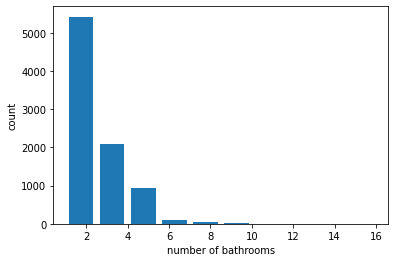

In [135]:
plt.hist(file8.bath,rwidth=0.8)
plt.xlabel("number of bathrooms")
plt.ylabel("count")

In [136]:
file8[file8.bath>file8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1945,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
6404,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7039,Rajaji Nagar,5 BHK,7500.0,8.0,1700.0,5,22666.666667
8283,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
10170,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [137]:
file9=file8[file8.bath<file8.bhk+2]
file9.shape

(8517, 7)

In [138]:
file10=file9.drop(["size","price_per_sqft"],axis="columns")
file10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [139]:
dummies=pd.get_dummies(file10.location)

In [140]:
file11=pd.concat([file10,dummies.drop("other",axis="columns")],axis="columns")
file11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,2400.0,4.0,450.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1000.0,3.0,60.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
file12=file11.drop("location",axis="columns")
file12.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
file12.shape

(8517, 245)

In [143]:
X=file12.drop("price",axis="columns")
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
Y=file12.price
Y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [145]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=10)

In [146]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test) #84% which is not good 


0.7735985626446431

In [147]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.81815377, 0.77944984, 0.54938592, 0.48883001, 0.77719024])

In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
#to find best model we write a function
def find_best_model_using_gridsearchcv(X,Y):
    algos={
        "linear regression":{
            "model": LinearRegression(),
            "params":{
                "normalize":[True,False]
            }
        },
        "lasso":{
            "model":Lasso(),
            "params":{
                "alpha":[1,2],
                "selection":["random","cyclic"]
            }
        },
        "decision_tree":{
            "model": DecisionTreeRegressor(),
            "params":{
                "criterion":["mse","friedman_mse"],
                "splitter":["best" , "random"]
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs=GridSearchCV(config["model"],config["params"],cv=cv,return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })
    return pd.DataFrame(scores,columns=["model","best_score","best_params"])
find_best_model_using_gridsearchcv(X,Y)


C:\Users\oshim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\oshim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be remo

,model,best_score,best_params
0,linear regression,0.682602,{'normalize': True}
1,lasso,0.566923,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.670420,"{'criterion': 'mse', 'splitter': 'random'}"


In [149]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]

    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1

    return lr_clf.predict([x])[0]

In [150]:
predict_price("1st Phase JP Nagar",1000,2,2)

C:\Users\oshim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.89737652775821

In [151]:
predict_price("Indira Nagar",1000,3,3)

C:\Users\oshim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


176.8287047050318